# PLOTS FOR PAPER

This notebook creates the plots for the paper. Figures are generated as PDFs in the directory cn.PLOT_DIR.

In [1]:
import pySubnetSB.constants as cn
from pySubnetSB.network import Network

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tellurium as te
from typing import List, Optional, Union

# Data Preparation

In [3]:
STRONG_DF = pd.read_csv(cn.SUBNET_BIOMODELS_STRONG_PATH).sort_values([cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME])
STRONG_DF = STRONG_DF.reset_index()
WEAK_DF = pd.read_csv(cn.SUBNET_BIOMODELS_WEAK_PATH).sort_values([cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME])
WEAK_DF = WEAK_DF.reset_index()
SUMMARY_DF = pd.read_csv(cn.BIOMODELS_SUMMARY_PATH).sort_values(cn.D_MODEL_NAME)
SUMMARY_DF = SUMMARY_DF.reset_index()

In [5]:
STRONG_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak
0,854,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","63242: 4 species, 3 reactions\n V_Pta: AcCoA ...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15.0,False,NaN,NaN,NaN,NaN,0.0,0.0
1,703,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","2006010: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6.0,False,NaN,NaN,NaN,NaN,0.0,0.0
2,298,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","9239969: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18.0,False,NaN,NaN,NaN,NaN,0.0,0.0
3,793,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","4369297: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24.0,False,0.0,0.0,0.0,0.0,0.0,0.0
4,1029,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3434857: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60.0,False,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
WEAK_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak
0,1301,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","7954902: 4 species, 3 reactions\n V_Pta: AcCo...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15.0,False,NaN,NaN,NaN,NaN,0.0,0.0
1,1218,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","7360183: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6.0,False,NaN,NaN,NaN,NaN,0.0,0.0
2,782,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","7617882: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18.0,False,NaN,NaN,NaN,NaN,0.0,0.0
3,0,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","8615539: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24.0,False,0.0,0.0,0.0,0.0,0.0,0.0
4,945,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3682315: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60.0,False,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
SUMMARY_DF.head

,index,model_name,num_reaction,num_species,trunceated_weak,truncated_strong,is_boundary_network,probability_of_occurrence_strong,probability_of_occurrence_weak
0,880,BIOMD0000000001,17,12,NaN,NaN,False,NaN,NaN
1,430,BIOMD0000000002,17,13,NaN,NaN,False,NaN,NaN
2,915,BIOMD0000000003,7,3,0.0,0.0,True,0.0,0.0
3,115,BIOMD0000000004,7,5,0.0,0.0,False,0.0,0.0
4,520,BIOMD0000000005,9,9,0.0,0.0,False,0.0,0.0
5,806,BIOMD0000000006,3,4,0.0,0.0,False,0.0,0.0
6,635,BIOMD0000000007,25,22,NaN,NaN,False,NaN,NaN
7,526,BIOMD0000000008,13,5,NaN,NaN,False,NaN,NaN
8,931,BIOMD0000000009,20,26,NaN,NaN,False,NaN,NaN
9,122,BIOMD0000000010,10,8,0.0,0.0,False,0.0,0.0


In [8]:
def makeMergeColumnName(column:str, is_reference:bool=True)->str:
    """
    Creates column names for merged result of subnet dataframe with summary dataframe.
    """
    if is_reference:
        suffix = "_reference"
    else:
        suffix = "_induced"
    return column + "_reference"

In [9]:
# Augment the subnet information with the reference num_reaction, num_species
def mergeWithSummary(subnet_df:pd.DataFrame=STRONG_DF)->pd.DataFrame:
    """
    Augment the subnet dataframe with summary information for reference network.
    """
    df = subnet_df.merge(SUMMARY_DF, right_on='model_name', left_on='reference_name',
                        suffixes=["_induced", "_reference"])
    df = df.reset_index()
    del df['index']
    drops = df['reference_name'] == 'something'
    df = df[~drops]
    df = df.reset_index()
    return df
#
df = mergeWithSummary()
assert(len([c for c in df.columns if "_reference" in c]) > 0)
assert(len([c for c in df.columns if "_induced" in c]) > 0)
assert(len(df) <= len(STRONG_DF))
print("OK!")

OK!


In [10]:
STRONG_DF = mergeWithSummary(STRONG_DF)
WEAK_DF = mergeWithSummary(WEAK_DF)

## Check for duplicates

In [58]:
def checkSubnetDuplicates(subnet_df:pd.DataFrame, is_fix:bool=True)->pd.DataFrame:
    df = subnet_df.copy()
    keys = [r + "_" + t for r, t in zip(df[cn.FINDER_REFERENCE_NAME], df[cn.FINDER_TARGET_NAME])]
    df['key'] = keys
    count_dct = {k: keys.count(k) for k in keys}
    if len(keys) > len(set(keys)):
        for key in[k for k in set(keys) if count_dct[k] > 1]:
            if is_fix:
                sel = df['key'] == key
                idxs = df.index[sel]
                df = df.drop(idxs[:-1])
            print(key + "\n")
            print(df[df['key'] == key])
    else:
        print("No duplicates!")
    return df
        

In [62]:
print("*** WEAK")
WEAK_DF = checkSubnetDuplicates(WEAK_DF, is_fix=True)
checkSubnetDuplicates(WEAK_DF, is_fix=False)
#
print("\n***STRONG")
STRONG_DF = checkSubnetDuplicates(STRONG_DF, is_fix=True)
checkSubnetDuplicates(STRONG_DF, is_fix=False)

*** WEAK
No duplicates!
No duplicates!

***STRONG
No duplicates!
No duplicates!


,index,index_induced,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong_induced,...,index_reference,model_name,num_reaction,num_species,trunceated_weak_reference,truncated_strong_reference,is_boundary_network,probability_of_occurrence_strong_reference,probability_of_occurrence_weak_reference,key
0,0,854,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","63242: 4 species, 3 reactions\n V_Pta: AcCoA ...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15.0,False,NaN,...,806,BIOMD0000000006,3,4,0.0,0.0,False,0.00000,0.00000,BIOMD0000000006_BIOMD0000000067
1,1,703,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","2006010: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6.0,False,NaN,...,806,BIOMD0000000006,3,4,0.0,0.0,False,0.00000,0.00000,BIOMD0000000006_BIOMD0000000715
2,2,298,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","9239969: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18.0,False,NaN,...,806,BIOMD0000000006,3,4,0.0,0.0,False,0.00000,0.00000,BIOMD0000000006_BIOMD0000000848
3,3,793,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","4369297: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24.0,False,0.0,...,156,BIOMD0000000027,4,5,0.0,0.0,False,0.00000,0.00000,BIOMD0000000027_BIOMD0000000170
4,4,1029,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3434857: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60.0,False,0.0,...,156,BIOMD0000000027,4,5,0.0,0.0,False,0.00000,0.00000,BIOMD0000000027_BIOMD0000000228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1209,470,BIOMD0000001048,BIOMD0000001059,"BIOMD0000001048: 3 species, 6 reactions\n mig...","9114784: 3 species, 6 reactions\n cleavage_of...","{""species_names"": {""Ttum"": ""pc3"", ""Tplas"": ""c3...",4.0,False,0.0,...,161,BIOMD0000001048,6,3,0.0,0.0,False,0.00000,0.00000,BIOMD0000001048_BIOMD0000001059
1210,1210,1174,BIOMD0000001056,BIOMD0000000294,"BIOMD0000001056: 3 species, 5 reactions\n Pro...","5701070: 3 species, 5 reactions\n r2: -> V\n...","{""species_names"": {""C1"": ""V"", ""C2"": ""S"", ""C3"":...",2.0,False,0.0,...,511,BIOMD0000001056,5,3,0.0,0.0,False,0.00008,0.00008,BIOMD0000001056_BIOMD0000000294
1211,1211,1026,BIOMD0000001056,BIOMD0000000810,"BIOMD0000001056: 3 species, 5 reactions\n Pro...","2698864: 3 species, 5 reactions\n growth_of_C...","{""species_names"": {""C1"": ""Cancer_Stem_Cells_S""...",9.0,False,0.0,...,511,BIOMD0000001056,5,3,0.0,0.0,False,0.00008,0.00008,BIOMD0000001056_BIOMD0000000810
1212,1212,1247,BIOMD0000001056,BIOMD0000000852,"BIOMD0000001056: 3 species, 5 reactions\n Pro...","9404313: 3 species, 5 reactions\n HSC_Self_Re...","{""species_names"": {""C1"": ""x0"", ""C2"": ""y0"", ""C3...",1.0,False,0.0,...,511,BIOMD0000001056,5,3,0.0,0.0,False,0.00008,0.00008,BIOMD0000001056_BIOMD0000000852


# Helpers

In [11]:
def makeTestDataFrame():
    df = pd.DataFrame({'reference_name': [0, 1, 1, 2, 2, 2], 'target_name': [0, 1, 1, 2, 2, 2]})
    return df.astype(str)
TEST_NUM_DUPLICATE = 5

In [12]:
def makeAntimony(model_name:str, is_reference:bool=True, subnet_df:pd.DataFrame=STRONG_DF, is_roadrunner_loadable:bool=False):
    """
    Transforms the string in a "network" cell into an antimony model
    """
    if is_reference:
        name_col = 'reference_name'
        network_col = 'reference_network'
    else:
        name_col = 'target_name'
        network_col = 'induced_network'
    models =  subnet_df[subnet_df[name_col] == model_name][network_col].values
    if len(models) == 0:
        return None
    model = models[0]
    if is_roadrunner_loadable:
        pos = model.index('tions\n')
        model = model[pos+7:]
        model = model.replace('\n', ';1\n')
        model += ";1;"
    return model

# TESTS
model = makeAntimony('BIOMD0000000224', is_roadrunner_loadable=True)
rr = te.loada(model)
model = makeAntimony('BIOMD0000000030')
assert(model is None)
print("OK!")

OK!


In [13]:
def extractBiomodelNum(stg:str)->int:
    """
    Extracts the number from the biomodels name.
    """
    substg = stg[5:]
    pos = np.min([n if c != '0' else 1000 for n, c in enumerate(substg)])
    try:
        result = int(substg[pos:])
    except:
        result = None
    return result

# TESTS
num = extractBiomodelNum('BIOMD0000000030')
assert(num == 30)
num = extractBiomodelNum('BIOMD0000002030')
assert(num == 2030)
print("OK!")

OK!


In [14]:
def checkDuplicates(df:pd.DataFrame, is_print:bool=True)->list:
    """
    Checks if elements are duplicated
    """
    keys = list(df['reference_name'] + df['target_name'])
    duplicates = []
    if len(keys) > len(set(keys)):
        duplicates = [k for k in keys if keys.count(k) > 1]
        if is_print:
            print(f"**Duplicate entries: {duplicates}")
    else:
        if is_print:
            print("**No duplicate entries")
    return duplicates

count = len(checkDuplicates(makeTestDataFrame(), is_print=False))
assert(count == TEST_NUM_DUPLICATE)
print("OK!")

OK!


In [15]:
def removeDuplicates(df:pd.DataFrame)->pd.DataFrame:
    """
    Remove rows where the reference_name + target_name is duplicated.

    Args:
        df: dataframe procesed

    Returns:
        DataFrame w/o duplicates
    """
    keys = np.array(df['reference_name'].astype(str) + df['target_name'].astype(str))
    all_positions = np.array(range(len(keys)))
    drop_idxs = []
    for key in set(keys):
        key_positions = all_positions[keys == key]
        drop_idxs.extend(key_positions[:-1])
    result_df = df.drop(drop_idxs)
    return result_df

# TESTS
df = makeTestDataFrame()
result_df = removeDuplicates(df)
assert(len(result_df) == 3)
print("OK!")   

OK!


In [16]:
def getTargetNames(reference_name:str, subnet_df:pd.DataFrame=STRONG_DF)->List[str]:
    """
    Gets the list of target names for the reference, if any.

    Args:
       reference_name: str

    Returns:
       list-str
    """
    sel = subnet_df["reference_name"] == reference_name
    if np.sum(sel) == 0:
        return None
    target_names = subnet_df[sel]["target_name"].values
    return target_names

# Tests
names = getTargetNames("BIOMD0000000224")
assert(len(names) > 0)
names = getTargetNames("BIOMD000000022x")
assert(names is None)
print("OK!")

OK!


In [17]:
def calculateLog10Probability(prob:Union[float, np.ndarray], min_prob=1e-5)->np.ndarray:
    """
    Calculates -Log10 of probabilities
    """
    if isinstance(prob, float) or isinstance(prob, int):
        new_prob = max(prob, min_prob)
    else:
        new_prob = np.array([max(v, min_prob) for v in prob])
    return -np.log10(new_prob)
        

# Tess
result = calculateLog10Probability(0.4)
result = calculateLog10Probability(0)
assert(result == 5)
#
result = calculateLog10Probability([0.5, 0])
assert(result[1] == 5)
print("OK!")

OK!


# Statistical significance of a network

Calculation of the POC of networks with weak and strong identity to the BioModels reference networks (those with number reactions <= 10)

In [18]:
def plotModelPOC(is_strong:bool=True, is_plot:bool=True):
    if is_strong:
        column = cn.D_PROBABILITY_OF_OCCURRENCE_STRONG
        adjective = 'Strong'
    else:
        column = cn.D_PROBABILITY_OF_OCCURRENCE_WEAK
        adjective = 'Weak'
    pivot_df = SUMMARY_DF.pivot_table(values=column,
                    index=cn.D_NUM_REACTION, columns=cn.D_NUM_SPECIES, aggfunc='median')
    pivot_df = pivot_df.map(lambda x: calculateLog10Probability(x))
    pivot_df.sort_index(level=0, ascending=False, inplace=True)
    if is_plot:
        sns.heatmap(pivot_df, annot=True, fmt="1.1f", cmap="coolwarm", vmin=0, vmax=5,
              annot_kws={'size': 8},
              cbar_kws={'label': '-log10 Probability of occurrence'})
        #plt.title(f"{adjective} Identity")
        plt.xlabel("number of species")
        plt.ylabel("number of reactions")
# Test
plotModelPOC(is_strong=True, is_plot=False)
print("OK!")

OK!


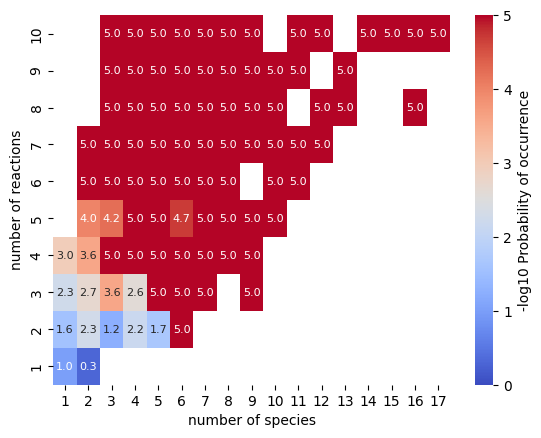

In [19]:
plotModelPOC(is_strong=True)
path = os.path.join(cn.PLOT_DIR, "strong_identity_significance_reference_networks.pdf")
plt.savefig(path)
# Little difference between strong and weak identity
#plt.figure()
#plotModelPOC(is_strong=False)

# Application to BioModels Reuse

In [167]:
def heatmapCount(induced_df, title:str="", is_plot:bool=True, is_count:bool=True,
        network_column=cn.FINDER_REFERENCE_NAME, vmax:int=-1):
    """
    Counts occurrences of reference networks in induced_df or the number of induced networks.
    Args:
        is_count (bool): count distinct values of network_count; if False, calculate ratio of all occurrences to distinct
    """
    # Calculate count of networks
    count_df = induced_df.copy()
    count_df = count_df[[network_column, cn.D_NUM_SPECIES, cn.D_NUM_REACTION]]
    count_df = count_df.drop_duplicates()
    #
    if is_count:
        # Count sizes of reference networks
        plot_df = count_df
        bar_label = 'count'
        fmt="1.0f"
        if vmax < 0:
            vmax = 10
    else:
        # Count occurrence of induced networks
        plot_df = induced_df
        bar_label = 'ratio'
        fmt="1.1f"
        if vmax < 0:
            vmax = 100
    network_ser = count_df.groupby([cn.D_NUM_SPECIES, cn.D_NUM_REACTION]).count()[network_column]
    induced_ser = induced_df.groupby([cn.D_NUM_SPECIES, cn.D_NUM_REACTION]).count()[network_column]
    if is_count:
        plot_ser = network_ser
    else:
        plot_ser = induced_ser/network_ser
    num_species = [x[0] for x in network_ser.index]
    num_reactions = [x[1] for x in network_ser.index]
    df = pd.DataFrame({cn.D_NUM_SPECIES: num_species, cn.D_NUM_REACTION: num_reactions, 'count': plot_ser.values})
    pivot_df = df.pivot_table(values='count', index=cn.D_NUM_REACTION, columns=cn.D_NUM_SPECIES)
    pivot_df.sort_index(level=0, ascending=False, inplace=True)
    if is_plot:
        sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="coolwarm", vmin=0, vmax=vmax,
              annot_kws={'size': 8},
              cbar_kws={'label': bar_label})
        plt.title(title)
        plt.xlabel("number species")
        plt.ylabel("number reactions")
# Test
heatmapCount(STRONG_DF, title="", is_plot=False, is_count=True)
print("OK!")

OK!


## Reference networks that induce networks

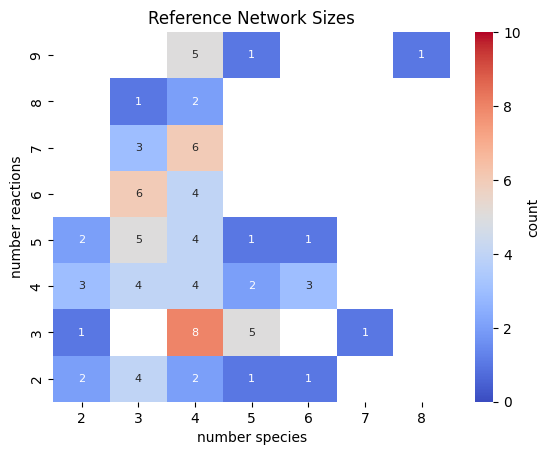

In [155]:
heatmapCount(STRONG_DF, title="Sizes of Inducing Reference Networks", is_plot=True, network_column=cn.FINDER_REFERENCE_NETWORK,
             is_count=True)
path = os.path.join(cn.PLOT_DIR, "all_reference_network_count.pdf")
plt.savefig(path)

In [153]:
constrained_strong_df = STRONG_DF.copy()
# Remove small reference networks
sel = [s > 3 and r > 3 for s, r in zip(constrained_strong_df[cn.D_NUM_SPECIES], constrained_strong_df[cn.D_NUM_REACTION])]
CONSTRAINED_STRONG_DF = constrained_strong_df[sel]

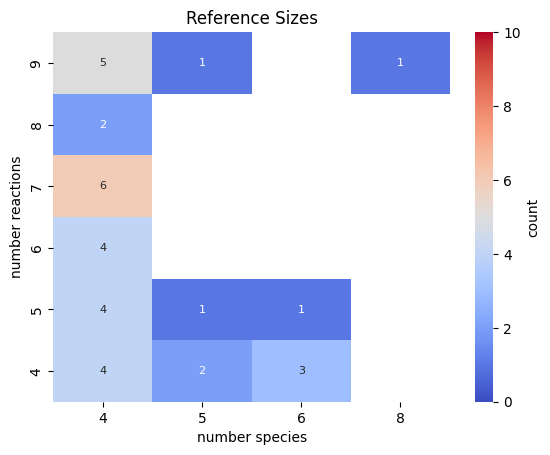

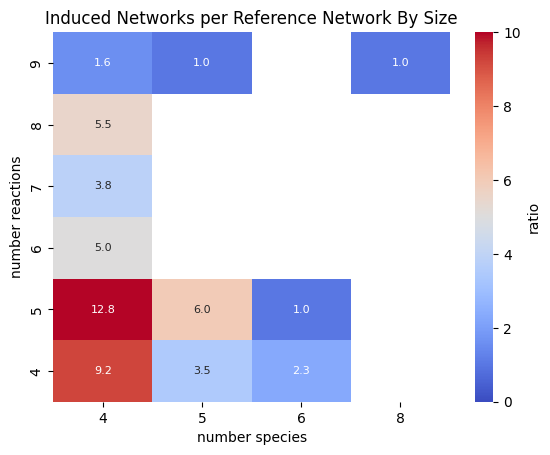

In [169]:
heatmapCount(CONSTRAINED_STRONG_DF, title="Reference Sizes", is_plot=True, network_column=cn.FINDER_REFERENCE_NETWORK,
             is_count=True)
path = os.path.join(cn.PLOT_DIR, "reference_network_count.pdf")
plt.savefig(path)
plt.figure()
heatmapCount(CONSTRAINED_STRONG_DF, title="Induced Networks per Reference Network By Reference Size",
             network_column=cn.FINDER_REFERENCE_NETWORK,
             is_count=False, vmax=10,
             is_plot=True)
path = os.path.join(cn.PLOT_DIR, "induced_network_reference.pdf")
plt.savefig(path)

In [69]:
print(f"Number of distinct reference models: {len(set(STRONG_DF[cn.FINDER_REFERENCE_NAME]))}")
print(f"Number of : {len(set(STRONG_DF[cn.FINDER_REFERENCE_NAME]))}")

Number of distinct reference models: 83


In [26]:
if False:
    heatmapPOC(STRONG_DF, 'probability_of_occurrence_strong_induced', title="Strong, Induced, POC", is_plot=True)
    plt.figure()
    heatmapPOC(WEAK_DF, 'probability_of_occurrence_strong_induced', title="Weak, Induced, POC", is_plot=True)

## Target networks with induced networks

In [157]:
strong_df = CONSTRAINED_STRONG_DF[[cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME]]
strong_df = strong_df.merge(SUMMARY_DF, right_on='model_name', left_on='target_name')
strong_df = strong_df[[cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME, cn.D_NUM_REACTION, cn.D_NUM_SPECIES]]
strong_df

,reference_name,target_name,num_reaction,num_species
0,BIOMD0000000027,BIOMD0000000170,17,7
1,BIOMD0000000027,BIOMD0000000228,22,9
2,BIOMD0000000027,BIOMD0000000354,11,6
3,BIOMD0000000027,BIOMD0000000355,17,9
4,BIOMD0000000031,BIOMD0000000170,17,7
...,...,...,...,...
168,BIOMD0000001035,BIOMD0000000352,12,6
169,BIOMD0000001035,BIOMD0000000539,11,6
170,BIOMD0000001035,BIOMD0000000748,11,4
171,BIOMD0000001043,BIOMD0000000058,11,4


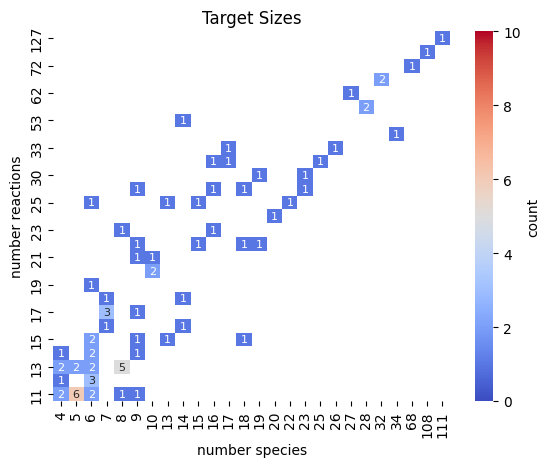

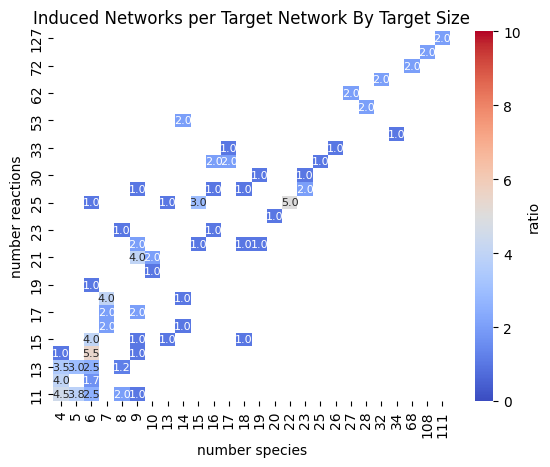

In [171]:
heatmapCount(strong_df, title="Target Sizes", is_plot=True, network_column=cn.FINDER_TARGET_NAME,
             is_count=True)
path = os.path.join(cn.PLOT_DIR, "target_network_count.pdf")
plt.savefig(path)
plt.figure()
heatmapCount(strong_df, title="Induced Networks per Target Network By Target Size", network_column=cn.FINDER_TARGET_NAME,
             is_count=False, vmax=10,
             is_plot=True)
path = os.path.join(cn.PLOT_DIR, "induced_network_target.pdf")
plt.savefig(path)

# Analysis

In [ ]:
# Scatter plot of subnets
xvals = [extractBiomodelNum(m) for m in STRONG_DF['reference_name']]
yvals = [extractBiomodelNum(m) for m in STRONG_DF['target_name']]
plt.scatter(xvals, yvals)
#plt.xlim([0, 300])
#plt.ylim([0, 300])
plt.plot([0,1000], [0, 1000], c='red')

Above the red line are target odels that embed an existing reference model. Below the red line indicate common motif without reuse. The dots below indicate opportunities for reuse.

In [ ]:
print(makeAntimony('BIOMD0000000150'))

In [165]:
# Print all of the reference models that appear in targets
names = list(set(CONSTRAINED_STRONG_DF[cn.FINDER_REFERENCE_NAME]))
names.sort()
print(f"Number of distinct networks: {len(names)}\n")
for name in names:
    result = makeAntimony(name)
    if result is not None:
        print(result + '\n\n')

Number of distinct networks: 34

BIOMD0000000027: 5 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M


BIOMD0000000031: 6 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M


BIOMD0000000121: 6 species, 5 reactions
  reaction_0000001: c3 -> c2
  reaction_0000002: c2 -> c1
  reaction_0000003: c1 -> o
  reaction_0000004: o -> i
  reaction_0000005: c1 -> i


BIOMD0000000178: 6 species, 4 reactions
  endocytosis: bound -> translocate
  translocation: translocate -> lytic
  binding: free -> bound
  bulk_movement: bulk -> free


BIOMD0000000224: 4 species, 6 reactions
  JChannel: CaS -> CaI
  JPump: CaI -> CaS
  kPLC:  -> IP3
  kPhosphatase: IP3 -> 
  inhibition_parameter1:  -> g
  inhibition_parameter2: g -> 


BIOMD0000000307: 5 species, 5 reactions
  r0: X -> R
  r1:  -> X
  r2: R -> 
  r3: E -> Ep
  r4: Ep -> E


BIOMD0000000309: 4 species, 4 reactions
  r0:  -> R
  r2: R -> 
  r3: Ep -> E
  r4: E -> Ep


BIOMD0000000310: 4 sp

# Notes

1. BioModels w/o significance
   1. Basic scatter
   2. Most induced reference and what it is
1. Significance evaluation
   1. Heat map.
   2. Little difference between weak and strong identity in terms of significance levels. How about subnets?
   3. Approximate significance with model size.
1. BioModels with significance
    1. Interesting reference models and where reused
        1. Double phos
        2. SIR
        3. MERK model
    1. Interesting targets -- lots of reference
1. Oscillator

In [176]:
import inspect

def my_function(arg1: int, arg2: str, a=1, b=2) -> bool:
    pass

signature = inspect.signature(my_function)
params = signature.parameters

for name, param in params.items():
    if name != 'arg1':
        continue
    import pdb; pdb.set_trace()
    print(f"Parameter: {name}")
    print(f"Type: {param.annotation}")
    print(f"Default Value: {param.default}")
    print(f"Kind: {param.kind}")
    print("---")


> /var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_52322/1908360933.py(13)<module>()
     11         continue
     12     import pdb; pdb.set_trace()
---> 13     print(f"Parameter: {name}")
     14     print(f"Type: {param.annotation}")
     15     print(f"Default Value: {param.default}")



ipdb>  param.default


<class 'inspect._empty'>


ipdb>  exit


In [194]:
import inspect
def getKeywordNames(func)->List[str]:
    signature = inspect.signature(func)
    params = signature.parameters
    result = []
    for name, param in params.items():
        if param.default != inspect._empty:
            result.append(name)
    return result

# Tests
def func1(a=1, b=2):
    pass
def func2(a=True, b='str'):
    pass
def func3(a, b='str'):
    pass
assert(np.all(getKeywordNames(func1) == ['a', 'b']))
assert(np.all(getKeywordNames(func2) == ['a', 'b']))
assert(np.all(getKeywordNames(func3) == ['b']))
print("OK!")
    

OK!
